In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import os
import random
import cv2

In [3]:

DATA_SET="/content/drive/My Drive/GDFiles/Stage_2"
CATEGORIES=["Memes","Notes"]

In [4]:
data=[]

IMG_SIZE=256

for category in CATEGORIES:
  folder=os.path.join(DATA_SET,category)
  label=CATEGORIES.index(category)
  for img in os.listdir(folder):
      img_path=os.path.join(folder,img)
      img_array=cv2.imread(img_path)
      img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      data.append([img_array,label])

In [5]:
random.shuffle(data)

X=[]
Y=[]

for features,labels in data:
    X.append(features)
    Y.append(labels)
X=np.array(X)
Y=np.array(Y)
XT=torch.from_numpy(X)  
YT=torch.from_numpy(Y) 



In [6]:
 from torch.utils.data import random_split

 nontest_ds, test_ds = random_split(data, [1580, 20])
 train_ds,val_ds= random_split(nontest_ds, [1500,80])
 len(train_ds),len(val_ds),len(test_ds)

(1500, 80, 20)

In [18]:
from torch.utils.data import DataLoader

batch_size = 5

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)
test_loader = DataLoader(test_ds, batch_size)

In [12]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet,self).__init__()
    self.conv1 = nn.Conv2d(3,96,11,stride=4)
    self.conv2 = nn.Conv2d(96,132,5,stride=4)
    self.conv3 = nn.Conv2d(132,158,(3,3))
    self.fc1 = nn.Linear(158*2*2,252)
    self.fc2 = nn.Linear(252,2)

  def forward(self,x):
    x = F.relu(self.conv1(x.float()))
    x = F.relu(self.conv2(x.float()))
    x = F.max_pool2d(x,(2,2))
    x = F.relu(self.conv3(x.float()))
    x = F.max_pool2d(x,(2,2))
    x = x.view(x.size(0),-1)
    x = F.relu(self.fc1(x.float()))
    x = self.fc2(x)
    return x

# training set with graph between losses vs epoch
(for training set batch size:50)

Epoch [1/5],  Loss: 4.8537
Epoch [2/5],  Loss: 0.2225
Epoch [3/5],  Loss: 0.1275
Epoch [4/5],  Loss: 0.0587
Epoch [5/5],  Loss: 0.1394


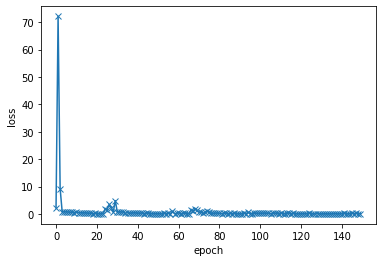

Finished Training
Accuracy of the network: 95.0 %


In [13]:
model = ConvNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs=5
losses=[]
for epoch in range(num_epochs):
    for images, labels in train_loader:
      images=images.permute(0,3,1,2)

        # Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
      losses.append(loss)
        # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      
    print (f'Epoch [{epoch+1}/{num_epochs}],  Loss: {loss.item():.4f}')
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print('Finished Training')


with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for images, labels in test_loader:
      images=images.permute(0,3,1,2)  
      outputs = model(images)
      # max returns (value ,index)
      _, predicted = torch.max(outputs, 1)
      n_samples += labels.size(0)
      n_correct += (predicted == labels).sum().item()
      
      

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    

# validation set with graph of loss vs epoch
(for validation set:
  value of batch size=5)

Epoch [1/5],  Loss: 0.7319
Epoch [2/5],  Loss: 0.5664
Epoch [3/5],  Loss: 0.0581
Epoch [4/5],  Loss: 0.0265
Epoch [5/5],  Loss: 0.0697


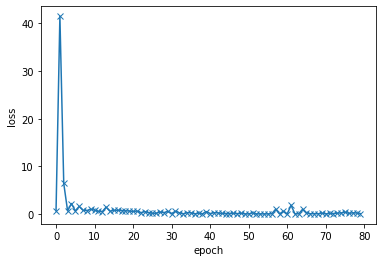

Finished Training
Accuracy of the network: 95.0 %


In [19]:
model = ConvNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs=5
losses=[]
for epoch in range(num_epochs):
    for images, labels in val_loader:
      images=images.permute(0,3,1,2)

        # Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
      losses.append(loss)
        # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      
    print (f'Epoch [{epoch+1}/{num_epochs}],  Loss: {loss.item():.4f}')
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print('Finished Training')


with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for images, labels in test_loader:
      images=images.permute(0,3,1,2)  
      outputs = model(images)
      # max returns (value ,index)
      _, predicted = torch.max(outputs, 1)
      n_samples += labels.size(0)
      n_correct += (predicted == labels).sum().item()
      
      

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    